# MKT Cycle ML Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# Import ML Data Frame

In [2]:
# %run finmktml
# Read ML data Frame

filename='./data/df_ml_20201013_195013_to_2020105.csv'
dfMLXY = pd.read_csv(filename,index_col=0,parse_dates=True)
#dfsp500 = dfsp500[dataStartDate:]

# remove T10Y3M since it constrains dataset to 1982
# dfMLXY.drop('T10Y3M',axis=1, inplace=True)


print(dfMLXY.shape)


dataStartDate=dt.datetime(1982,1,4) # with T10Y3M
drop_t10y3m=True
if drop_t10y3m == True:
    dfMLXY.drop('T10Y3M',axis=1,inplace=True)
    dataStartDate=dt.datetime(1955,1,1) # Consumer sentiment available from 1953 -2 1
    

dfMLXY=dfMLXY.loc[dataStartDate:]

print(dfMLXY.columns.values)
print(dfMLXY.dtypes)
print(dfMLXY.shape)
display(dfMLXY.head(3))
display(dfMLXY.tail(3))

(18122, 50)
['Close' 'High' 'Low' 'Open' 'Volume' 'mkt' 'mcupm' 'mcnr' 'mucdown'
 'mdcup' 'PE' 'Earnings' 'GDP' 'gdp_qoq' 'recession1q' 'recession2q'
 'UNRATE' 'UNRATE_avgvel3' 'CPIAUCSL' 'cpimom' 'UMCSENT' 'UMCSENT_avgvel3'
 'Close_nma1' 'Volume_nma1' 'Close_nma5' 'Volume_nma5' 'Close_nma10'
 'Volume_nma10' 'Close_nma15' 'Volume_nma15' 'Close_nma20' 'Volume_nma20'
 'Close_nma30' 'Volume_nma30' 'Close_nma50' 'Volume_nma50' 'Close_nma200'
 'Volume_nma200' 'rma_sma50_sma200' 'rma_sma20_sma50' 'PDI50' 'NDI50'
 'ADX' 'Close_lrstd25' 'Close_lrstd63' 'Close_lrstd126'
 'Close_lrstd25_avgvel5' 'Close_lrstd63_avgvel5' 'Close_lrstd126_avgvel5']
Close                     float64
High                      float64
Low                       float64
Open                      float64
Volume                    float64
mkt                       float64
mcupm                     float64
mcnr                      float64
mucdown                   float64
mdcup                     float64
PE               

,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,...,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5
Date,,,,,,,,,,,,,,,,,,,,,
1955-01-01,35.980000,35.980000,35.980000,35.980000,3840000.0,1.0,1.0,1.159664,0.00000,0.0,...,0.035326,67.846367,32.153633,31.135684,0.008795,0.007370,0.006617,-0.000031,0.000007,-0.000019
1955-01-03,36.750000,36.750000,36.750000,36.750000,4570000.0,1.0,1.0,1.205882,0.00000,0.0,...,0.035439,72.144500,27.855500,31.651500,0.009610,0.007754,0.006846,0.000103,0.000068,0.000019
1955-01-04,36.419998,36.419998,36.419998,36.419998,4420000.0,1.0,1.0,1.186074,0.00898,0.0,...,0.035034,68.084748,31.915252,31.828676,0.009625,0.007867,0.006910,0.000089,0.000081,0.000035


,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,...,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,3380.800049,3397.179932,3361.389893,3385.870117,4.070530e+09,1.0,1.0,0.511040,0.055864,0.0,...,-0.005419,24.520203,23.428824,14.045695,0.014455,0.010507,0.014129,0.000126,-0.000007,-0.000378
2020-10-02,3348.419922,3369.100098,3323.689941,3338.939941,3.961550e+09,1.0,1.0,0.496567,0.064907,0.0,...,-0.007230,23.566008,25.085963,13.422419,0.014451,0.010558,0.014163,0.000044,0.000001,-0.000365
2020-10-05,3408.600098,3409.570068,3367.270020,3367.270020,3.686920e+09,1.0,1.0,0.523465,0.048100,0.0,...,-0.008623,25.337339,24.043249,12.808537,0.014977,0.010737,0.013950,0.000100,0.000005,-0.000304


### Nulls

In [3]:
%run fmml


    
dfMLXY=dfMLXY.loc[dataStartDate:]

print(dfMLXY.shape)

# Null Rows
nullrows=sum([True for idx,row in dfMLXY.iterrows() if any(row.isnull())])
nrows=len(dfMLXY)
print("nrows = ",nrows,"null_rows = ",nullrows)

# UMCSENT starts in 1953 2 -1 ... set the start date to 1955-1-1
# GDP starts 1950
# Yield Curve Starts in 1982,1,4
# UNRATE starts in 1950
# CPI start in 1950


display(dfMLXY[dfMLXY.isna().any(axis=1)])
dfMLXY.tail(3)

(16850, 49)
nrows =  16850 null_rows =  0


,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,...,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5
Date,,,,,,,,,,,,,,,,,,,,,


,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,...,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,3380.800049,3397.179932,3361.389893,3385.870117,4.070530e+09,1.0,1.0,0.511040,0.055864,0.0,...,-0.005419,24.520203,23.428824,14.045695,0.014455,0.010507,0.014129,0.000126,-0.000007,-0.000378
2020-10-02,3348.419922,3369.100098,3323.689941,3338.939941,3.961550e+09,1.0,1.0,0.496567,0.064907,0.0,...,-0.007230,23.566008,25.085963,13.422419,0.014451,0.010558,0.014163,0.000044,0.000001,-0.000365
2020-10-05,3408.600098,3409.570068,3367.270020,3367.270020,3.686920e+09,1.0,1.0,0.523465,0.048100,0.0,...,-0.008623,25.337339,24.043249,12.808537,0.014977,0.010737,0.013950,0.000100,0.000005,-0.000304


# Create X and Y dataframes

### Y

In [4]:
# Y dataframes
dfY=pd.DataFrame(dfMLXY['mkt'])
dfY.rename(columns={'mkt':'y'},inplace=True)
dfY['y']=(dfY['y']+1)/2
display(dfY.head(3))

# note mkt is contained by X and Y dataframes
# it is okay to put market into X
# mkt will be shifted in the training so that 'mkt' is for days preceeding the truth variable
print(dfY.shape)

,y
Date,
1955-01-01,1.0
1955-01-03,1.0
1955-01-04,1.0


(16850, 1)


### X

In [5]:
# Extract X, with Feature Scaling
#   scaling is applied to columns, whereas normalization is applied to rows
#   scaling is important for some algorithms
#  MinMax Scaling - robust to small standard deviations
#      these variables are fairly well constrained
#                          to small std deviations 
#      mdcuup, mucdown
#      close_price_nma1
#      close_price_nma50, close_price_nma200,  rma_sma50_sma200
#      csentmom
#  Mean/Variance Scaling - most common form of scalig, good for well
#     behaved distribtions. Normal, not long tailed, or heavily skewed
#     Take out the mean and divide by std deviation
#     Use this for all variables except the aforementioned two
#    
# note mkt is contained by X and Y dataframes
# it is okay to put market into X
# mkt will be shifted in the training so that 'mkt' is for days preceeding the truth variable 'mkt'


#minmax_cols=[ 'mcupm' , 'mdcup', 'mucdown', 'Close_nma1', 'Close_nma5', 'Close_nma10','Close_nma15','Close_nma20',
#              'Close_nma30','Close_nma50', 'Close_nma200',  
#              'rma_sma50_sma200','csentmom',]

#meanvar_cols=['Volume_nma1' ,'gdp_qoq','gdp_prevqoq' , 
#              'UNRATE' , 'CPIAUCSL' , 'cpimom' ,'NDI50' , 'PDI50',
#               'ADX' , 'UMCSENT', 'Close_lrstd50', 'Close_lrstd126','T10Y3M']


dfX = dfMLXY.drop(['Close','High','Low','Open','Volume','mkt','mcnr','Earnings','GDP'],axis=1)
x_columns=dfX.columns
#  .... these seem to make the performance worse for now, try after PCA

from sklearn.preprocessing import StandardScaler
SScaler=StandardScaler()
X=SScaler.fit_transform(dfX)

#from sklearn.preprocessing import MinMaxScaler
#MMScaler=MinMaxScaler()
#X2=MMScaler.fit_transform(dfMLXY[minmax_cols])
#cols=minmax_cols+meanvar_cols
#X = np.column_stack((X1, X2))
dfX=pd.DataFrame(data=X, columns=dfX.columns, index=dfX.index)
print(dfX.shape)
display(dfX.tail(3))
print(dfX.columns)

(16850, 40)


,mcupm,mucdown,mdcup,PE,gdp_qoq,recession1q,recession2q,UNRATE,UNRATE_avgvel3,CPIAUCSL,...,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,0.310998,0.466254,-0.246619,0.929924,-8.103241,4.209777,7.130649,1.187014,-4.364608,1.785556,...,-0.411762,-0.192188,-0.119947,-0.661183,1.119300,0.357656,1.147780,0.383529,-0.041312,-3.741888
2020-10-02,0.310998,0.683719,-0.246619,0.904476,-8.103241,4.209777,7.130649,1.187014,-4.364608,1.785556,...,-0.489725,-0.263466,0.029245,-0.742989,1.118598,0.368159,1.155258,0.132797,0.005321,-3.613180
2020-10-05,0.310998,0.279548,-0.246619,0.951773,-8.103241,4.209777,7.130649,1.187014,-4.364608,1.785556,...,-0.549692,-0.131148,-0.064630,-0.823561,1.217932,0.404744,1.108244,0.303872,0.031321,-3.004770


Index(['mcupm', 'mucdown', 'mdcup', 'PE', 'gdp_qoq', 'recession1q',
       'recession2q', 'UNRATE', 'UNRATE_avgvel3', 'CPIAUCSL', 'cpimom',
       'UMCSENT', 'UMCSENT_avgvel3', 'Close_nma1', 'Volume_nma1', 'Close_nma5',
       'Volume_nma5', 'Close_nma10', 'Volume_nma10', 'Close_nma15',
       'Volume_nma15', 'Close_nma20', 'Volume_nma20', 'Close_nma30',
       'Volume_nma30', 'Close_nma50', 'Volume_nma50', 'Close_nma200',
       'Volume_nma200', 'rma_sma50_sma200', 'rma_sma20_sma50', 'PDI50',
       'NDI50', 'ADX', 'Close_lrstd25', 'Close_lrstd63', 'Close_lrstd126',
       'Close_lrstd25_avgvel5', 'Close_lrstd63_avgvel5',
       'Close_lrstd126_avgvel5'],
      dtype='object')


# Feature Alignment

In [35]:
# Feature and Label Alignment

Ndays=[1,3,5,7,10,15,20,25,50,100]
NdayFeatures = [['mcupm','mucdown','mdcup', 'CPIAUCSL', 'cpimom','UMCSENT','UMCSENT_avgvel3',
                 'UNRATE','UNRATE_avgvel3','recession1q','recession2q','PE','gdp_qoq',
                'Close_nma1','Volume_nma1'],
                ['Close_nma5','Volume_nma5'],
                ['Close_nma10','Volume_nma10'],
                ['Close_nma15','Volume_nma15'],
                ['Close_nma20','Volume_nma20'],
                ['Close_nma30','Volume_nma30'],
                ['Close_lrstd25','Close_lrstd25_avgvel5'],
                ['Close_nma50','Volume_nma50','NDI50','PDI50','ADX','rma_sma20_sma50'], 
                ['Close_lrstd63','Close_lrstd63_avgvel5'],
                ['Close_nma200','rma_sma50_sma200','Volume_nma200', 'Close_lrstd126','Close_lrstd126_avgvel5'],
                ]


if drop_t10y3m == False:
    NdayFeatures[0].append('T10Y3m')



# these caused decrease in performance .... Close_lrstd50, Close_lrstd126
#  1st round remove bottom three feature importances mdcup, T10Y3M, UNRATE
#  2nd round PDI50, nma20, nma30 gdpqoq cpiucsl
dfXaligned=pd.DataFrame(data=dfX[dfX.columns[0]],index=dfX.index)
dfYaligned=pd.DataFrame(data=dfY[dfY.columns[0]],index=dfY.index)

# Align
for nday,ndayfeatures in zip(Ndays,NdayFeatures):
    for ndayfeature in ndayfeatures:
        featurename=ndayfeature+'_nd'+str(nday-1)
        dfXaligned[featurename]=dfX[ndayfeature].shift(nday-1)    
ndaymax=max(Ndays)

# the first column was a dummy so drop it
print('dfX.columns[0]=',dfX.columns[0])
dfXaligned.drop(dfX.columns[0],axis=1,inplace=True)


# first ndaymax rows will have nulls due to the shifting ... drop
print('ndaymax =',ndaymax)
dfXaligned=dfXaligned.loc[dfXaligned.index[ndaymax]:]
dfYaligned=dfYaligned.loc[dfYaligned.index[ndaymax]:]

# shift the target variable out by one day
target_variable='y'
new_target_variable = target_variable+'_1'
dfYaligned[new_target_variable] = dfY[target_variable].shift(-1)
dfYaligned.drop(target_variable,axis=1,inplace=True)

# print some diagnostic info
print(dfXaligned.columns)
display(dfXaligned.tail(3))
display(dfYaligned.tail(3))

# RF performance ... from 1985-1-2 to 2020-8-24  .. decision includ Close_lrst50
 #sdwith Close_lrst50 
  # accuracy = 0.9906961103015357
  # precision (tp /(tp + fp))= 0.9649484536082474
  # recall tp /(tp + fn) = 0.950253807106599
  # fscore = 2*precision*recall / (precision + recall) =  0.9575447570332482
  # tp = 936 fp = 34 tn = 7902 fn = 49



dfX.columns[0]= mcupm
ndaymax = 100
Index(['mcupm_nd0', 'mucdown_nd0', 'mdcup_nd0', 'CPIAUCSL_nd0', 'cpimom_nd0',
       'UMCSENT_nd0', 'UMCSENT_avgvel3_nd0', 'UNRATE_nd0',
       'UNRATE_avgvel3_nd0', 'recession1q_nd0', 'recession2q_nd0', 'PE_nd0',
       'gdp_qoq_nd0', 'Close_nma1_nd0', 'Volume_nma1_nd0', 'Close_nma5_nd2',
       'Volume_nma5_nd2', 'Close_nma10_nd4', 'Volume_nma10_nd4',
       'Close_nma15_nd6', 'Volume_nma15_nd6', 'Close_nma20_nd9',
       'Volume_nma20_nd9', 'Close_nma30_nd14', 'Volume_nma30_nd14',
       'Close_lrstd25_nd19', 'Close_lrstd25_avgvel5_nd19', 'Close_nma50_nd24',
       'Volume_nma50_nd24', 'NDI50_nd24', 'PDI50_nd24', 'ADX_nd24',
       'rma_sma20_sma50_nd24', 'Close_lrstd63_nd49',
       'Close_lrstd63_avgvel5_nd49', 'Close_nma200_nd99',
       'rma_sma50_sma200_nd99', 'Volume_nma200_nd99', 'Close_lrstd126_nd99',
       'Close_lrstd126_avgvel5_nd99'],
      dtype='object')


,mcupm_nd0,mucdown_nd0,mdcup_nd0,CPIAUCSL_nd0,cpimom_nd0,UMCSENT_nd0,UMCSENT_avgvel3_nd0,UNRATE_nd0,UNRATE_avgvel3_nd0,recession1q_nd0,...,PDI50_nd24,ADX_nd24,rma_sma20_sma50_nd24,Close_lrstd63_nd49,Close_lrstd63_avgvel5_nd49,Close_nma200_nd99,rma_sma50_sma200_nd99,Volume_nma200_nd99,Close_lrstd126_nd99,Close_lrstd126_avgvel5_nd99
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,0.310998,0.466254,-0.246619,1.785556,0.260755,-1.110763,-3.408157,1.187014,-4.364608,4.209777,...,0.442471,0.212151,1.459315,1.216213,-0.971439,-0.179151,-2.008521,-0.136613,4.194513,0.296299
2020-10-02,0.310998,0.683719,-0.246619,1.785556,0.260755,-1.110763,-3.408157,1.187014,-4.364608,4.209777,...,0.430916,0.344679,1.490195,1.218367,-0.236862,-0.155120,-2.026346,-0.173329,4.195186,0.219278
2020-10-05,0.310998,0.279548,-0.246619,1.785556,0.260755,-1.110763,-3.408157,1.187014,-4.364608,4.209777,...,0.447812,0.468654,1.526891,1.163100,-0.304216,-0.058227,-2.028869,-0.090971,4.226233,0.497554


,y_1
Date,
2020-10-01,1.0
2020-10-02,1.0
2020-10-05,NaN


# Feature Selection Dimensionality Reduction

### PCA

n components 14


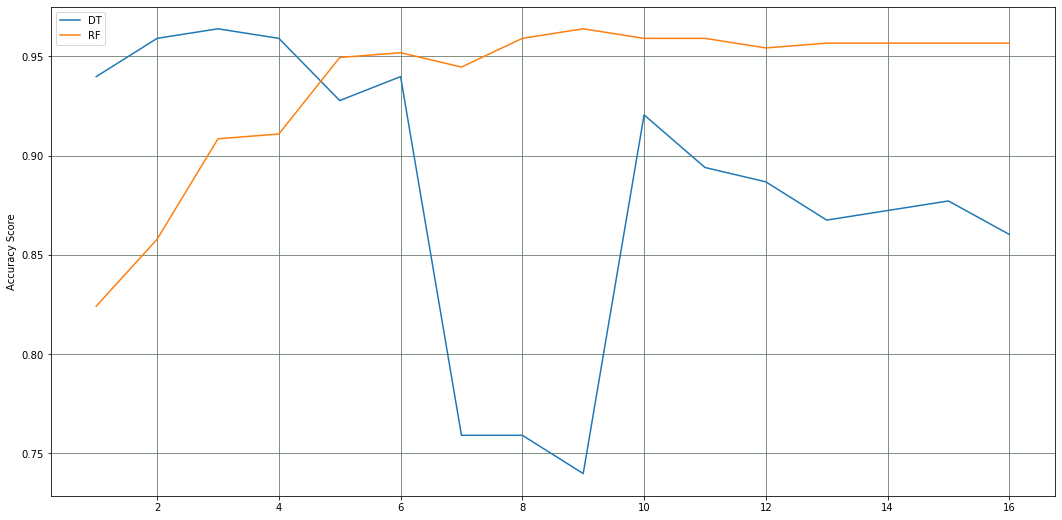

In [7]:

from sklearn.decomposition import PCA
Npca=14
pca_model = PCA(n_components=Npca)
XPCA = pca_model.fit_transform(dfXaligned)

dfXPCA=pd.DataFrame(data=XPCA,index=dfXaligned.index)

print('n components',pca_model.n_components_)

## PCA training results summary
# Model = DT, Model Train Days = 5
# predict start/end  2019-1-2 /2020-8-24 ... accuracy score = 0.9507389162561576
# PCA Accuracy Scores

# v2 adds PE, lrstd_velocity,  unrate velocity
# v2 DT, modeldays = 5, PCA off ... 
#   accuracy = 0.955, precision = 0.8578, recall =0.8746, fscore 0.8656


# v2 RF, modeldays = 5, PCA off
#  ./data/dfxyp_RF_5days_2000-1-3_to_2020-8-24.csv
#  accuracy = 98.2%, precision =97%, recall = 92.36%, fscore 94.6%


v1_scores_dt=[0.9397590361445783, 0.9590361445783132, 0.963855421686747, 0.9590361445783132,
        0.927710843373494, 0.9397590361445783, 0.7590361445783133, 0.7590361445783133, 
        0.7397590361445783, 0.9204819277108434, 0.8939759036144578, 0.8867469879518072,
        0.8674698795180723, 0.8722891566265061, 0.8771084337349397, 0.8602409638554217]


v1_scores_rf=[0.8240963855421687,0.8578313253012049, 0.908433734939759,0.9108433734939759,
           0.9493975903614458, 0.9518072289156626, 0.944578313253012, 0.9590361445783132,
           0.963855421686747, 0.9590361445783132, 0.9590361445783132, 0.9542168674698795,
           0.9566265060240964, 0.9566265060240964, 0.9566265060240964, 0.9566265060240964]

x=list(range(1,len(v1_scores_dt)+1))
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[18,9])
ax.plot(x,v1_scores_dt,label='DT')
ax.plot(x,v1_scores_rf,label='RF')
ax.set_ylabel("Accuracy Score")
ax.legend(loc='upper left')


plt.grid(b=True, which='major', color='#667667', linestyle='-')
plt.show()


# RF performance with Percent of Variance
# https://stats.stackexchange.com/questions/22569/pca-and-proportion-of-variance-explained
nc = [9, 8]
p = [0.95,0.9]
score_p = [0.963855421686747, 0.9590361445783132]

# RF performance 9 PCA components, 2000-1-2 to 2020-8-24, model days = 5
# 0.90 accuracy ... the model does not perform so well. Better to go w/o PCA for RF model
# accuracy =  0.948, Precision =0.938, Recall =0.763, tp tp = 679 fp = 45 tn = 4033 fn = 211
# not so good!
# stick with non PCA

### RF Drop Features of Least Importance

In [66]:
# RF performance better without feature reduction


# Try dropping feastures with importance less < .01

low_imp_cols1=  ['recession2q_nd0', 'Volume_nma1_nd0', 'Volume_nma5_nd2', 'Close_nma1_nd0', 
                'Volume_nma10_nd4', 'Close_lrstd25_avgvel5_nd19', 'Volume_nma15_nd6', 
                'Volume_nma20_nd9', 'recession1q_nd0', 'Close_lrstd63_avgvel5_nd49', 
                'Volume_nma30_nd14', 'Close_lrstd126_avgvel5_nd99', 'Close_nma5_nd2', 'Volume_nma50_nd24']



#  Next run drop bottom 3 with importance .0155 or lower 
low_imp_cols2 =['Close_nma10_nd4', 'Close_nma15_nd6', 'rma_sma20_sma50_nd24', 'Close_nma20_nd9']
#low_imp_cols2=[]

# Next drop some highly correlated 
low_imp_cols3 = ['ADX_nd24', 'NDI50_nd24', 'PDI50_nd24'  ]

# Combine all cols to be dropped
low_imp_cols=low_imp_cols1+low_imp_cols2+low_imp_cols3


#low_imp_cols=[]
print('low imp cols = ',low_imp_cols)
print("num low importance cols =",len(low_imp_cols))

v2_RF_acc=[0.986 0.987, 0.9868, 0.983]
v2_RF_precision=[0.966 0.974, 0.974, 0.972]
v2_RF_recall=[0.95 0.947 0.945 0.925]
v2_features=[19 21, 26, 40]


# v2 after redesign of EDA and Feature Engineering
# v2 19
    #posvalue = 0 negvalue = 1
    #accuracy = 0.9864687088893065
    #precision (tp /(tp + fp))= 0.9664351851851852
    #recall tp /(tp + fn) = 0.9510250569476082
    #fscore = 2*precision*recall / (precision + recall) =  0.9586681974741676
    #tp = 835 fp = 29 tn = 4414 fn = 43

# v2 22  ./data/dfxyp_RF_v2_days5_nfeatures22_2000-1-3_to_2020-10-5.csv
    #posvalue = 0 negvalue = 1
    #accuracy = 0.987220447284345
    #precision (tp /(tp + fp))= 0.9742388758782201
    #recall tp /(tp + fn) = 0.9476082004555809
    #fscore = 2*precision*recall / (precision + recall) =  0.9607390300230946
    #tp = 832 fp = 22 tn = 4421 fn = 46
    
# v2 26  ./data/dfxyp_RF_v2_days5_nfeatures26_2000-1-3_to_2020-10-5.csv
    # posvalue = 0 negvalue = 1
    #accuracy = 0.9870325126855855
    #precision (tp /(tp + fp))= 0.9753231492361927
    #recall tp /(tp + fn) = 0.9453302961275627
    #fscore = 2*precision*recall / (precision + recall) =  0.9600925390399074
    #tp = 830 fp = 21 tn = 4422 fn = 48


# v2 40  ./data/dfxyp_RF_v2_days5_nfeatures40_2000-1-3_to_2020-10-5.csv
    # posvalue = 0 negvalue = 1
    # accuracy = 0.9834617553091524
    # precision (tp /(tp + fp))= 0.972488038277512
    # recall tp /(tp + fn) = 0.9259681093394078
    # fscore = 2*precision*recall / (precision + recall) =  0.9486581096849475
    #tp = 813 fp = 23 tn = 4420 fn = 65
    
# v1
# without Close_lrstd50 ...from 1985-1-2 to 2020-8-24
   #accuracy = 0.9895751597354556
   #precision (tp /(tp + fp))= 0.951417004048583
   #recall tp /(tp + fn) = 0.9543147208121827
   #fscore = 2*precision*recall / (precision + recall) =  0.952863659401926
   #tp = 940 fp = 48 tn = 7888 fn = 45
    
# v1 
# with Close_lrstd50 ..from 1955-1-2 to 2020-8-24    
   # accuracy = 0.9899155579855415
   # precision (tp /(tp + fp))= 0.9753659407354516
   # recall tp /(tp + fn) = 0.9657122658183104
   # fscore = 2*precision*recall / (precision + recall) =  0.9705150976909415
   # tp = 2732 fp = 69 tn = 13563 fn = 97
    
#  v1
#  with T10Y3M .... from from 1985-1-2 to 2020-8-24 
   # accuracy = 0.9922654410940478
   # precision (tp /(tp + fp))= 0.9692622950819673
   # recall tp /(tp + fn) = 0.9604060913705583
   # fscore = 2*precision*recall / (precision + recall) =  0.9648138704742478
   # tp = 946 fp = 30 tn = 7906 fn = 39

low imp cols =  ['recession2q_nd0', 'Volume_nma1_nd0', 'Volume_nma5_nd2', 'Close_nma1_nd0', 'Volume_nma10_nd4', 'Close_lrstd25_avgvel5_nd19', 'Volume_nma15_nd6', 'Volume_nma20_nd9', 'recession1q_nd0', 'Close_lrstd63_avgvel5_nd49', 'Volume_nma30_nd14', 'Close_lrstd126_avgvel5_nd99', 'Close_nma5_nd2', 'Volume_nma50_nd24', 'Close_nma10_nd4', 'Close_nma15_nd6', 'rma_sma20_sma50_nd24', 'Close_nma20_nd9', 'ADX_nd24', 'NDI50_nd24', 'PDI50_nd24']
num low importance cols = 21


### Feature Selection

In [67]:
PCAflag=False
if PCAflag == True:
    dfTrain=dfXPCA
else:
    dfTrain=dfXaligned.drop(low_imp_cols,axis=1)
    
print('dfTrain.shape =',dfTrain.shape)
dfTrain.columns

dfTrain.shape = (16750, 19)


Index(['mcupm_nd0', 'mucdown_nd0', 'mdcup_nd0', 'CPIAUCSL_nd0', 'cpimom_nd0',
       'UMCSENT_nd0', 'UMCSENT_avgvel3_nd0', 'UNRATE_nd0',
       'UNRATE_avgvel3_nd0', 'PE_nd0', 'gdp_qoq_nd0', 'Close_nma30_nd14',
       'Close_lrstd25_nd19', 'Close_nma50_nd24', 'Close_lrstd63_nd49',
       'Close_nma200_nd99', 'rma_sma50_sma200_nd99', 'Volume_nma200_nd99',
       'Close_lrstd126_nd99'],
      dtype='object')

# Model Training

In [68]:
# Training and Prediction
#   Features          dfX = dfMLXY.loc[train_s:test_e]
#   Labels            dfY = dfT.loc[train_s:train_e]
#   Train/Predict     mClfTrainTest() classifier training and prediction."fit" classifier from test_s date to test_e
#                      dsMake one prediction per date, looking ahead by ndays and save in order to compare later to labels.
#                      dftr DataFrame
#   Volatility & MA   Compute volatility and moving averages heuristic model.
#   Save              save DataFrame "dftr" training results from t := train_s:train_e
#   Confusion Matrix  Compute and print confusion matrix
#   Plot              Training summary vs. nday

%run fmml

# dates
#predict_s = dt.datetime(2020,8,11)      # 2016 for daily predictions, 2000, 1970, 1960
#predict_e = dt.datetime(2020,8,24)

#predict_s = dt.datetime(2019,1,2) 
#predict_e = dt.datetime(2020,8,24)

predict_s = dt.datetime(2000,1,3)
predict_e = dt.datetime(2020,10,5)

#predict_s = dt.datetime(1985,1,2) 
#predict_e = dt.datetime(2020,8,24)

#predict_s = dt.datetime(1955,1,3) 
#predict_e = dt.datetime(2020,8,24)

# Model Training and Prediction

# join X and Y into one j
#dfXY = dfX.join(dfY)
# Nday and NdayFeatures


# Machine Learning
model='RF' #
print("...")
trainall=True
trainsamples=10000
model_days=5
   
dfXYTR,dfTR,clf = fmclftraintest(dfTrain,dfYaligned,'y_1',predict_s,predict_e,k_model_days=model_days,
                model=model,trainsamples=trainsamples,trainall=trainall,v=1)

display(dfTR[['p_1','y_1','model_date']].tail(10))


...
train after every k = 5 days
predict start date = 2000-01-03
predict end date =  2020-10-05
train samples requested = 10000
train samples available = 11429

2001-01-01 train samples requested = 11684 train samples available = 11684
  samples = 11684 pos samples = 2147 neg samples = 9537
  pos samplesize = 2147 neg samplesize = 9537
  accuracy =  0.953
  precision (tp /(tp + fp)) = 1.000
  recall tp /(tp + fn) = 0.940
  fscore = 2*precision*recall / (precision + recall) = 0.969
  tp = 187 fp = 0 tn = 57 fn = 12
2002-01-01 train samples requested = 11939 train samples available = 11939
  samples = 11939 pos samples = 2331 neg samples = 9608
  pos samplesize = 2331 neg samplesize = 9608
  accuracy =  0.955
  precision (tp /(tp + fp)) = 0.971
  recall tp /(tp + fn) = 0.969
  fscore = 2*precision*recall / (precision + recall) = 0.970
  tp = 370 fp = 11 tn = 118 fn = 12
2003-01-01 train samples requested = 12194 train samples available = 12194
  samples = 12194 pos samples = 2469 neg sam

,p_1,y_1,model_date
Date,,,
2020-09-22,1.0,1.0,2020-09-18
2020-09-23,1.0,1.0,2020-09-18
2020-09-24,1.0,1.0,2020-09-18
2020-09-25,1.0,1.0,2020-09-18
2020-09-28,1.0,1.0,2020-09-25
2020-09-29,1.0,1.0,2020-09-25
2020-09-30,1.0,1.0,2020-09-25
2020-10-01,1.0,1.0,2020-09-25
2020-10-02,1.0,1.0,2020-09-25


In [70]:
# Join the training results with some of the original data
# needed for analyzing and visualizing
dfxyp=dfMLXY[['Close','Volume','High','Low','PE','Earnings',
              'mcnr','mcupm','mdcup','mucdown','mkt']].join(dfXYTR[['p','y_1','p_1','model_date']],lsuffix='l',rsuffix='r', how='outer' )

display(dfxyp.tail(5))

,Close,Volume,High,Low,PE,Earnings,mcnr,mcupm,mdcup,mucdown,mkt,p,y_1,p_1,model_date
Date,,,,,,,,,,,,,,,
2020-09-29,3335.469971,3.651880e+09,3357.919922,3327.540039,28.676351,116.314311,0.490780,1.0,0.0,0.068523,1.0,1.0,1.0,1.0,2020-09-25
2020-09-30,3363.000000,4.722530e+09,3393.560059,3340.469971,28.910000,116.326531,0.503084,1.0,0.0,0.060835,1.0,1.0,1.0,1.0,2020-09-25
2020-10-01,3380.800049,4.070530e+09,3397.179932,3361.389893,29.060000,116.338611,0.511040,1.0,0.0,0.055864,1.0,1.0,1.0,1.0,2020-09-25
2020-10-02,3348.419922,3.961550e+09,3369.100098,3323.689941,28.781673,116.338611,0.496567,1.0,0.0,0.064907,1.0,1.0,1.0,1.0,2020-09-25
2020-10-05,3408.600098,3.686920e+09,3409.570068,3367.270020,29.298958,116.338611,0.523465,1.0,0.0,0.048100,1.0,1.0,NaN,1.0,2020-10-02


In [71]:
# save model data
today=dt.datetime.today()
nfeatures=dfTrain.shape[1]
save_model_df=True
if save_model_df==True:
    savedir='./data'
    s=predict_s
    e=predict_e
    if PCAflag == True: 
        filename='dfxyp'+'_'+model+'_v2_'+'days'+str(model_days)+'_nfeatures'+str(nfeatures)+'_pca'+str(Npca)+'_'+str(s.year)+'-'+str(s.month)+'-'+str(s.day)
    else:
        filename='dfxyp'+'_'+model+'_v2_'+'days'+str(model_days)+'_nfeatures'+str(nfeatures)+'_'+str(s.year)+'-'+str(s.month)+'-'+str(s.day)
    filename=savedir+'/'+filename+'_to_'+str(e.year)+'-'+str(e.month)+'-'+str(e.day)+'.csv'
    print('save file:',filename)
    dfxyp.reset_index().to_csv(filename,index=False)
    
    
# save file: 
# ../data/dfxyp_RF_v2_days5_nfeatures40_2000-1-3_to_2020-10-5.csv
# ./data/dfxyp_RF_v2_days5_nfeatures26_2000-1-3_to_2020-10-5.csv
# ./data/dfxyp_RF_v2_days5_nfeatures22_2000-1-3_to_2020-10-5.csv
# ./data/dfxyp_RF_v2_days5_nfeatures19_2000-1-3_to_2020-10-5.csv


save file: ./data/dfxyp_RF_v2_days5_nfeatures19_2000-1-3_to_2020-10-5.csv


In [60]:
# read dfxyp
filename='./data/dfxyp_RF_5days_2000-1-3_to_2020-8-24.csv'
read=False
if read==True:
    dfxyp = pd.read_csv(filename,index_col=0,parse_dates=True)

In [72]:
# save model pickle 
import pickle
save_model_pickle=True

if save_model_pickle==True:
    nfeatures=dfTrain.shape[1]
    filename='pickle'+'_'+model+'_v2_'+'days'+str(model_days)+'_nfeatures'+str(nfeatures)+'_'+str(s.year)+'-'+str(s.month)+'-'+str(s.day)
    filename=savedir+'/'+filename+'_to_'+str(e.year)+'-'+str(e.month)+'-'+str(e.day)
    with open(filename,'wb') as fout:
        pickle.dump(clf,fout)
    print('save filename:',filename)
    
#  ./data/pickle_RF_v2_days5_nfeatures40_2000-1-3_to_2020-10-5
# ./data/pickle_RF_v2_days5_nfeatures26_2000-1-3_to_2020-10-5
# ./data/pickle_RF_v2_days5_nfeatures22_2000-1-3_to_2020-10-5
# ./data/pickle_RF_v2_days5_nfeatures19_2000-1-3_to_2020-10-5

save filename: ./data/pickle_RF_v2_days5_nfeatures19_2000-1-3_to_2020-10-5


In [ ]:
# Read pickle
filename = s;adfksadfk 
read_model_pickle=False
if read_model_pickle==True:
    with open(filename, 'rb') as fin:
        clf = pickle.load(fin)

In [73]:
## Smooth The prediction

    #####################################################################
    ###  Smooth with previous predictions, majority vote              ###
    ###  amount of smoothing is controlled with the input parameter   ###
    ###  ks, and placed in the "p_s" variable. See input argument     ###
    ######################################################################
smooth=4
dfxyp['p_s']=dfxyp['p_1']*2  - 1  # convert variable to be +/- 1
for ks in range(1,smooth+1):
    dfxyp['p_s']=dfxyp['p_s']+dfxyp['p_s'].shift(ks)
dfxyp.loc[dfxyp.p_s > 0 , 'p_s']= 1   # convert back to 0 and 1
dfxyp.loc[dfxyp.p_s < 0 , 'p_s']= 0

dfxyp.tail(5)   

,Close,Volume,High,Low,PE,Earnings,mcnr,mcupm,mdcup,mucdown,mkt,p,y_1,p_1,model_date,p_s
Date,,,,,,,,,,,,,,,,
2020-09-29,3335.469971,3.651880e+09,3357.919922,3327.540039,28.676351,116.314311,0.490780,1.0,0.0,0.068523,1.0,1.0,1.0,1.0,2020-09-25,1.0
2020-09-30,3363.000000,4.722530e+09,3393.560059,3340.469971,28.910000,116.326531,0.503084,1.0,0.0,0.060835,1.0,1.0,1.0,1.0,2020-09-25,1.0
2020-10-01,3380.800049,4.070530e+09,3397.179932,3361.389893,29.060000,116.338611,0.511040,1.0,0.0,0.055864,1.0,1.0,1.0,1.0,2020-09-25,1.0
2020-10-02,3348.419922,3.961550e+09,3369.100098,3323.689941,28.781673,116.338611,0.496567,1.0,0.0,0.064907,1.0,1.0,1.0,1.0,2020-09-25,1.0
2020-10-05,3408.600098,3.686920e+09,3409.570068,3367.270020,29.298958,116.338611,0.523465,1.0,0.0,0.048100,1.0,1.0,NaN,1.0,2020-10-02,1.0


## Confusion Matrix

In [74]:
# Confusion Matrix "p"
%run fmml
(accuracy,precision,recall,fscore,dfcma,dfcmr,tp,fp,tn,fn)=fmclfperformance(dfxyp,'y_1','p_1')


,Predicted Positive,Predicted Negative,Totals
actual Positive,835,43,2826
actual Negative,29,4414,13923


posvalue = 0 negvalue = 1
accuracy = 0.9864687088893065
precision (tp /(tp + fp))= 0.9664351851851852
recall tp /(tp + fn) = 0.9510250569476082
fscore = 2*precision*recall / (precision + recall) =  0.9586681974741676
tp = 835 fp = 29 tn = 4414 fn = 43


## Feature Importance and Explainability

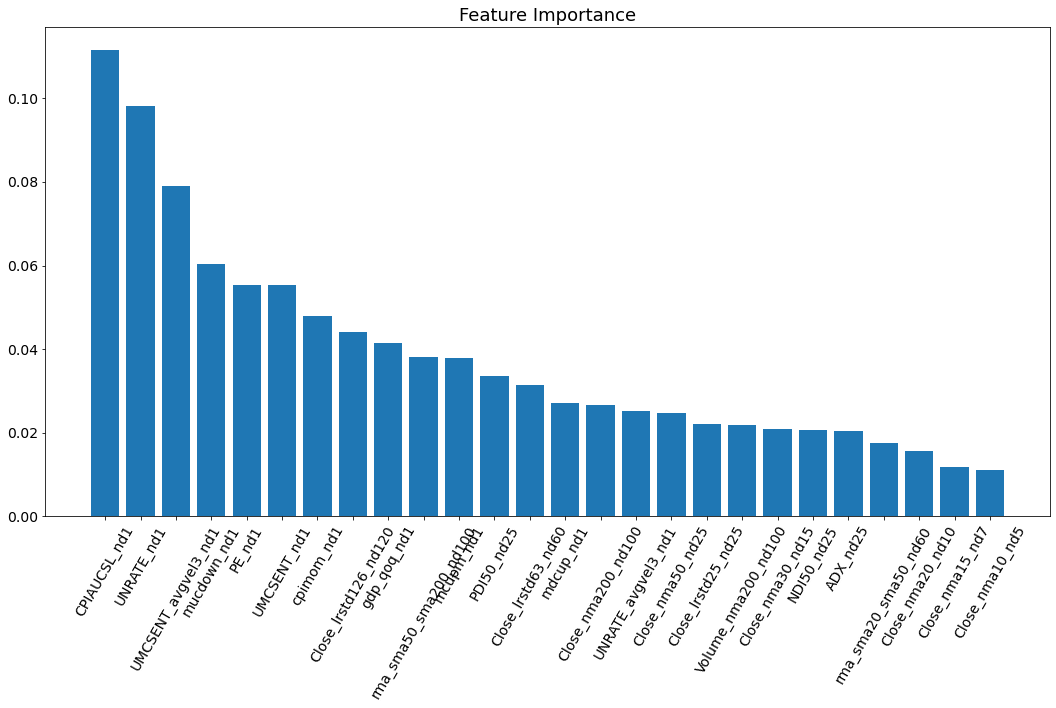

In [38]:
# Feature Importance 
# https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/
importances=clf.feature_importances_
# sort importances in descending order
indices = list(np.argsort(importances)[::-1])
# rearange feature names so they match the sorted features
feature_names=dfTrain.columns
names = [ feature_names[i] for i in indices]

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[18,9])
ax.bar(names, importances[indices])
plt.xticks(rotation=60,fontsize=14)
plt.yticks(fontsize=14)
#ax.grid(color='b', ls = '-.', lw = 0.25)
ax.set_title("Feature Importance",fontsize=18)
# Show plot
plt.show()

[0.01104998 0.01253444 0.01507902 0.01557522 0.0192951  0.02086451
 0.02221385 0.02222471 0.02227201 0.02483782 0.02567916 0.02621103
 0.02804077 0.03167608 0.03534773 0.03833606 0.04160225 0.04196601
 0.04213025 0.04870339 0.05642376 0.05790308 0.0580467  0.0822593
 0.08896123 0.11076654]
['Close_nma10_nd4', 'Close_nma15_nd6', 'rma_sma20_sma50_nd24', 'Close_nma20_nd9', 'Close_nma30_nd14', 'Close_lrstd25_nd19', 'Volume_nma200_nd99', 'NDI50_nd24', 'ADX_nd24', 'Close_nma50_nd24', 'Close_nma200_nd99', 'mdcup_nd0', 'UNRATE_avgvel3_nd0', 'Close_lrstd63_nd49', 'PDI50_nd24', 'rma_sma50_sma200_nd99', 'mcupm_nd0', 'Close_lrstd126_nd99', 'gdp_qoq_nd0', 'cpimom_nd0', 'UMCSENT_nd0', 'mucdown_nd0', 'PE_nd0', 'UMCSENT_avgvel3_nd0', 'UNRATE_nd0', 'CPIAUCSL_nd0']


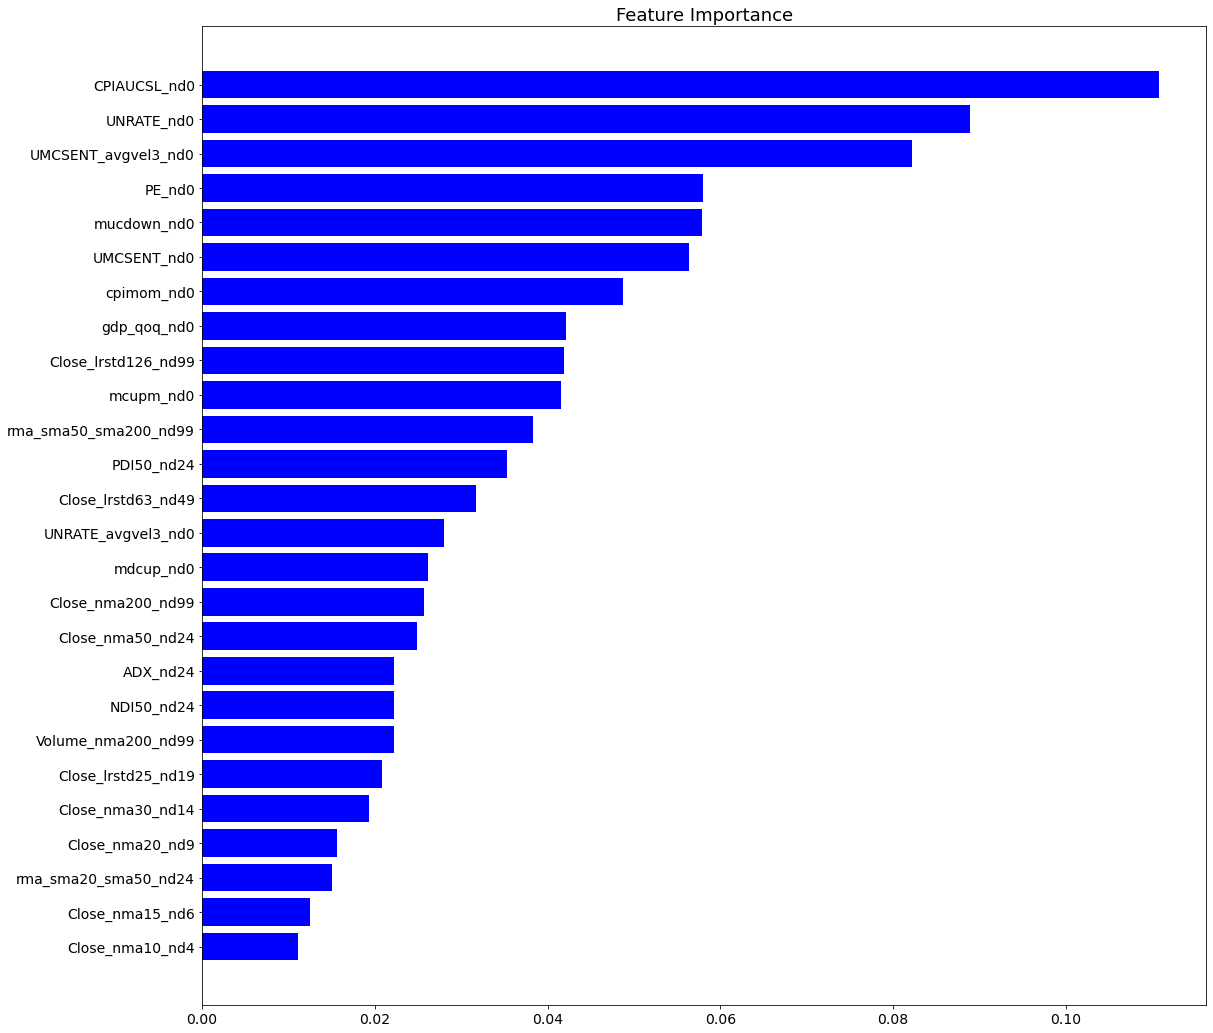

In [55]:
# horizontal bars
importances=clf.feature_importances_
# sort importances in descending order
indices = list(np.argsort(importances))
# rearange feature names so they match the sorted features
feature_names=dfTrain.columns
names = [ feature_names[i] for i in indices]

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[18,18])
ax.barh(names, importances[indices], color = 'blue', align ='center')
plt.xticks(rotation=0,fontsize=14)
plt.yticks(fontsize=14)
#ax.grid(color='b', ls = '-.', lw = 0.25)
ax.set_title("Feature Importance",fontsize=18)
# Show plot

print(importances[indices])
print(names)
plt.show()

In [669]:
# Decision Tree 

from sklearn import tree
from sklearn.tree import export_text
fig = plt.figure(figsize=(25,20))

feature_names=list(dfXaligned.columns)
#_ = tree.plot_tree(clf, feature_names=feature_names, class_names=['up','down'],filled=True)
#fig.savefig("DecisionTree.png")
t=tree.export_text(clf,feature_names=feature_names)
print(t)

#with open("decistion_tree.log", "w") as fout:
#    fout.write(t)

|--- csentmom_nd1 <= 0.50
|   |--- Close_nma200_nd100 <= 1.22
|   |   |--- cpimom_nd1 <= 0.61
|   |   |   |--- Close_nma200_nd100 <= -0.31
|   |   |   |   |--- class: 1.0
|   |   |   |--- Close_nma200_nd100 >  -0.31
|   |   |   |   |--- NDI50_nd25 <= 0.40
|   |   |   |   |   |--- Close_nma50_nd25 <= -0.23
|   |   |   |   |   |   |--- Close_nma15_nd7 <= 0.75
|   |   |   |   |   |   |   |--- Close_nma10_nd5 <= -4.80
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Close_nma10_nd5 >  -4.80
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Close_nma15_nd7 >  0.75
|   |   |   |   |   |   |   |--- mcupm_nd1 <= -0.72
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- mcupm_nd1 >  -0.72
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Close_nma50_nd25 >  -0.23
|   |   |   |   |   |   |--- cpimom_nd1 <= 0.41
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- cpi

<Figure size 1800x1440 with 0 Axes>

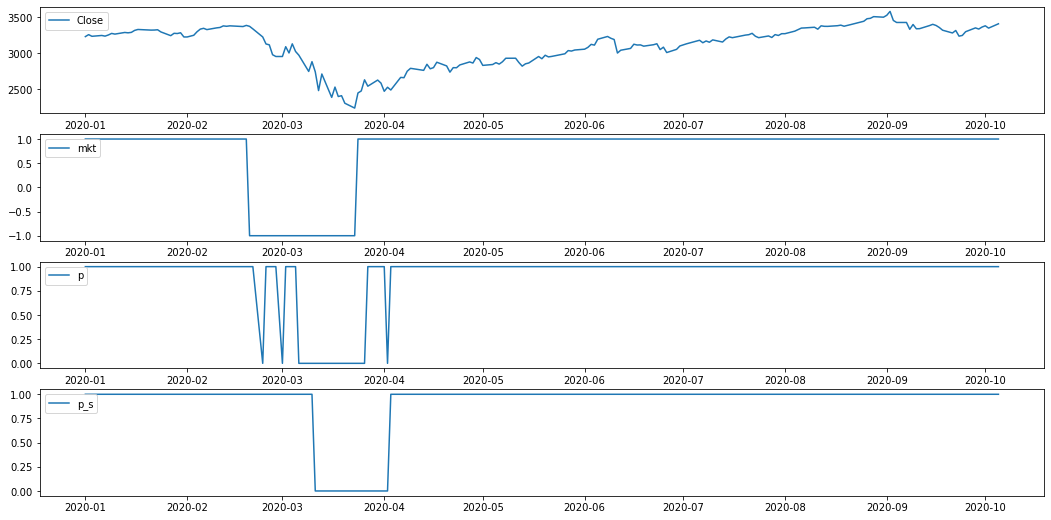

In [41]:
%run fmplot

startdate=dt.datetime(2020,1,1)
enddate=dt.datetime(2020,10,5)


#fmplot(dfxyp,variables, startdate=startdate, enddate=enddate)

variables=['Close','mkt','p','p_s']
fig,ax = plt.subplots(nrows=len(variables),ncols=1,figsize=[18,9])

for k,name in zip(range(0,len(variables)),variables):
    ax[k].plot(dfxyp.loc[startdate:enddate,name],label=name)
    #ax[k].set_xlabel("date")
    ax[k].set_ylabel("")
    ax[k].legend(loc='upper left')

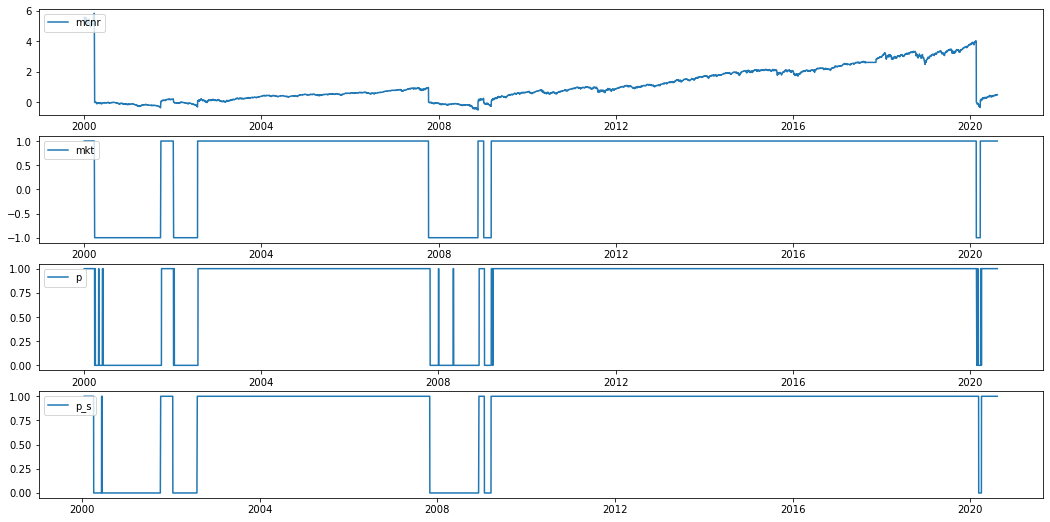

In [43]:




startdate=dt.datetime(2008,10,1)
enddate=dt.datetime(2009,2,1)

startdate=dt.datetime(2000,1,1)
enddate=dt.datetime(2020,8,11)

#startdate=dt.datetime(2019,1,1)
#enddate=dt.datetime(2020,8,11)

#startdate=dt.datetime(2000,1,1)
#enddate=dt.datetime(2001,12,31)



name=['mcnr','Close','mkt','p','p_s']
name=['mcnr','mkt','p','p_s']
fig,ax = plt.subplots(nrows=len(name),ncols=1,figsize=[18,9])
k=list(range(0,len(name)))
for k,name in zip(k,name):
    ax[k].plot(dfxyp.loc[startdate:enddate,name],label=name)
    #ax[k].set_xlabel("date")
    ax[k].set_ylabel("")
    ax[k].legend(loc='upper left')



###### Backtest

In [45]:
# backtest
%run fmml

startdate=dt.datetime(1955,1,1)
startdate=dt.datetime(2000,1,1)
enddate=dt.datetime(2020,10,5)
price_variable='Close'
predictor='p_s'

# Backtest
(dftsummary,dfreturns,dfbt)=fmbacktest(dfxyp[startdate:enddate].copy(),price_variable,predictor)

In [46]:
dftsummary

,start_date,end_date,start_price,end_price,start_strategyvalue,end_strategyvalue,r,r_strategy
2000,2000-01-01,2001-01-01,1469.250000,1320.280029,1469.250000,1502.675616,-0.101392,0.022750
2001,2001-01-01,2001-12-31,1320.280029,1148.079956,1502.675616,1610.251962,-0.130427,0.071590
2002,2002-01-01,2002-12-31,1148.079956,879.820007,1610.251962,1636.582001,-0.233660,0.016352
2003,2003-01-01,2003-12-31,879.820007,1111.920044,1636.582001,2068.318878,0.263804,0.263804
2004,2004-01-01,2004-12-31,1111.920044,1211.920044,2068.318878,2254.332153,0.089935,0.089935
2005,2005-01-01,2006-01-01,1211.920044,1248.290039,2254.332153,2321.985171,0.030010,0.030010
2006,2006-01-01,2007-01-01,1248.290039,1418.300049,2321.985171,2638.226357,0.136194,0.136194
2007,2007-01-01,2007-12-31,1418.300049,1468.359985,2638.226357,2847.900465,0.035296,0.079475
2008,2008-01-01,2008-12-31,1468.359985,903.250000,2847.900465,2936.256321,-0.384858,0.031025
2009,2009-01-01,2009-12-31,903.250000,1115.099976,2936.256321,3914.322217,0.234542,0.333100


In [19]:
dfbt.head(3)

,Close,Volume,Close_sma50,Close_sma200,mcnr,mcupm,mdcup,mucdown,mkt,p,y_1,p_1,model_date,p_s,Close_R,Close_strategyvalue
Date,,,,,,,,,,,,,,,,
1985-01-02,165.369995,67820000.0,165.5528,160.41680,0.614626,1.0,0.0,0.042166,1.0,NaN,1.0,1.0,1984-12-31,NaN,0.000000,165.369995
1985-01-03,164.570007,88880000.0,165.4970,160.44535,0.606815,1.0,0.0,0.046800,1.0,1.0,1.0,1.0,1984-12-31,NaN,-0.004838,164.570007
1985-01-04,163.679993,77480000.0,165.4288,160.47045,0.598125,1.0,0.0,0.051955,1.0,1.0,1.0,1.0,1984-12-31,NaN,-0.005408,163.679993


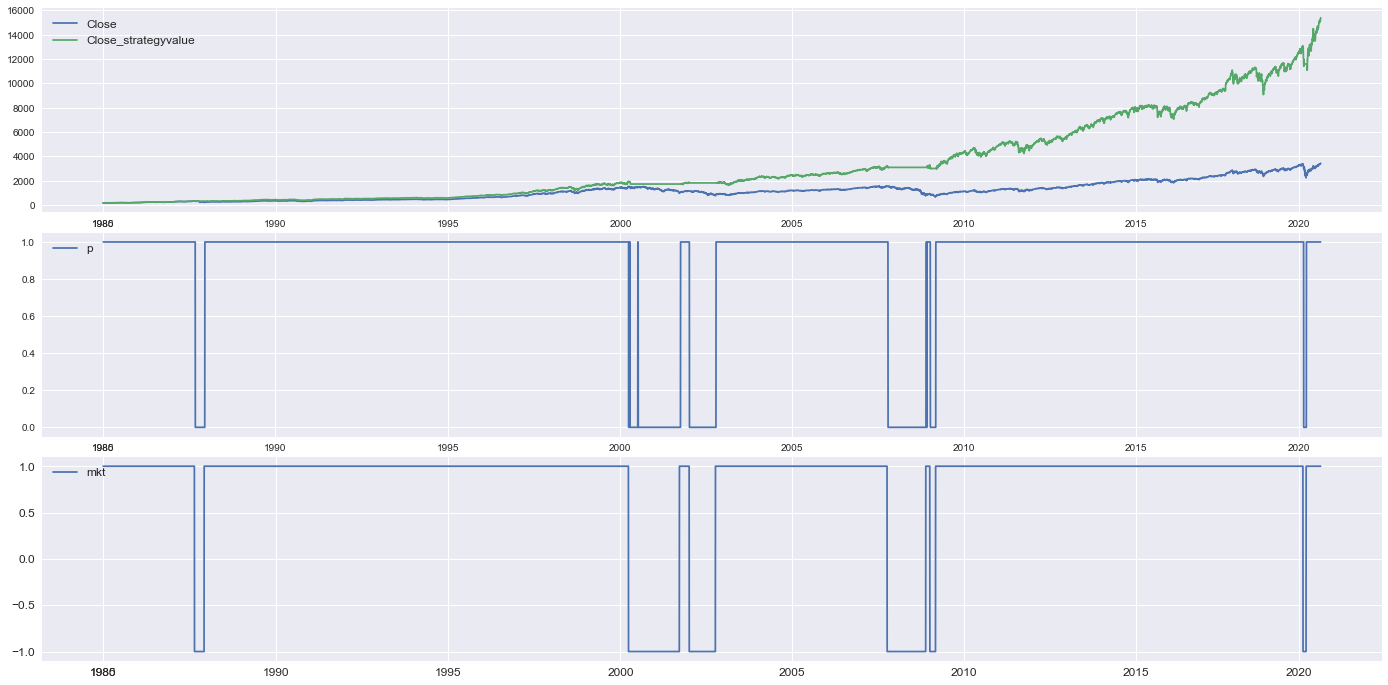

In [49]:
%run fmplot
s=dt.datetime(1980,1,1)
e=dt.datetime(2020,12,31)
dfbt['mkt2']=(dfbt['mkt']+1)/2
fmplot(dfbt,variables=[['Close','Close_strategyvalue'],'p','mkt'],startdate=s,enddate=e)

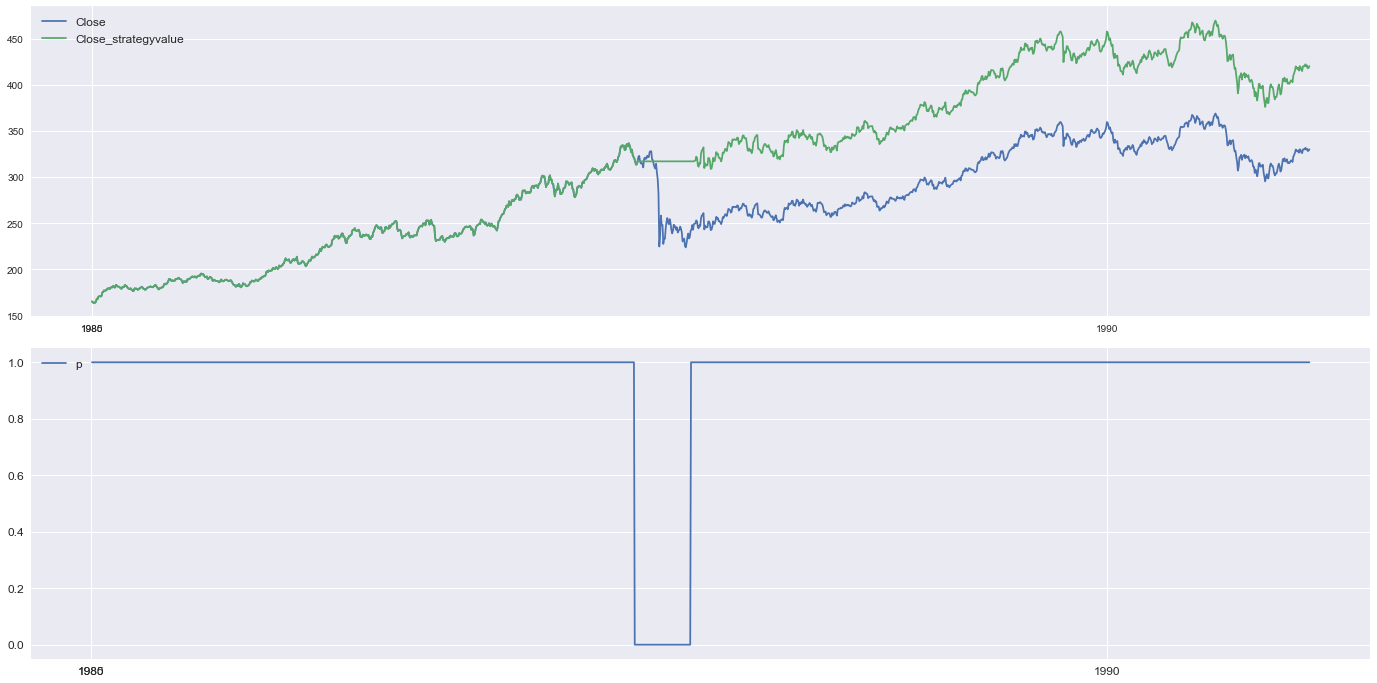

In [50]:
%run fmplot
s=dt.datetime(1980,1,1)
e=dt.datetime(1990,12,31)
fmplot(dfbt,variables=[['Close','Close_strategyvalue'],'p'],startdate=s,enddate=e)

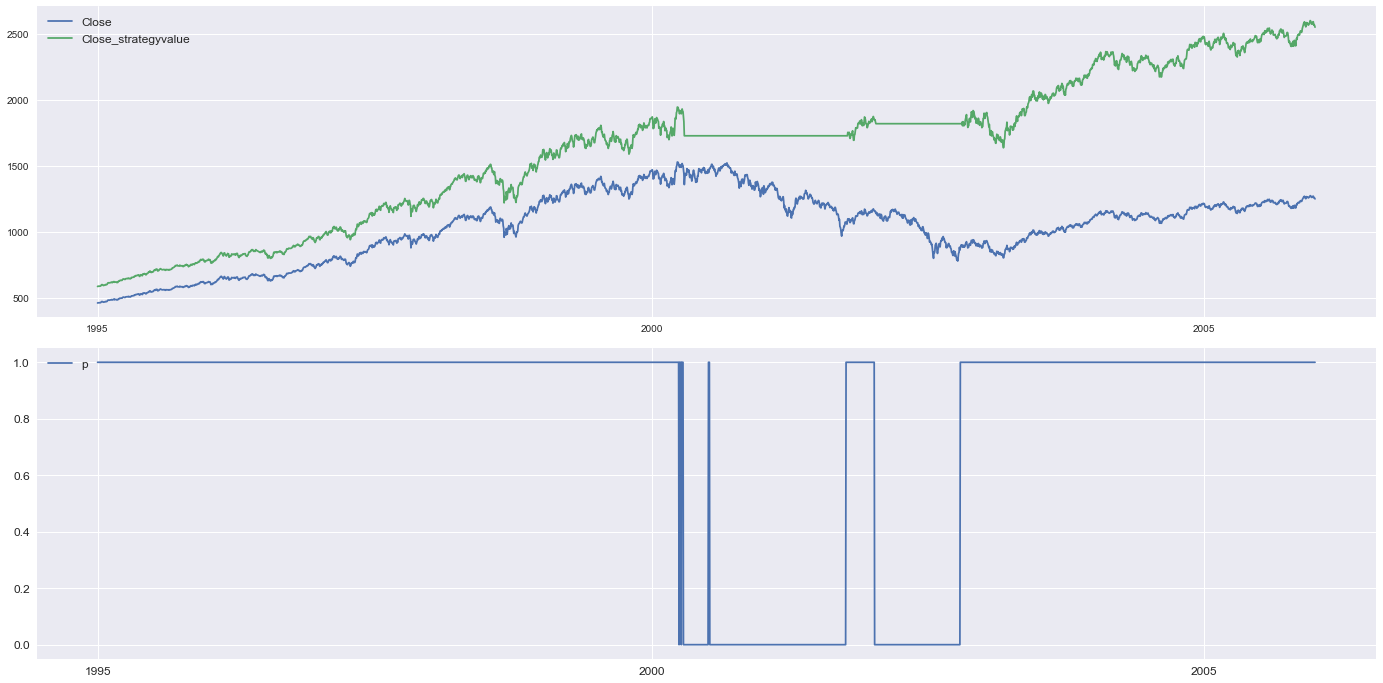

In [55]:
%run fmplot
s=dt.datetime(1995,1,1)
e=dt.datetime(2005,12,31)
fmplot(dfbt,variables=[['Close','Close_strategyvalue'],'p'],startdate=s,enddate=e)

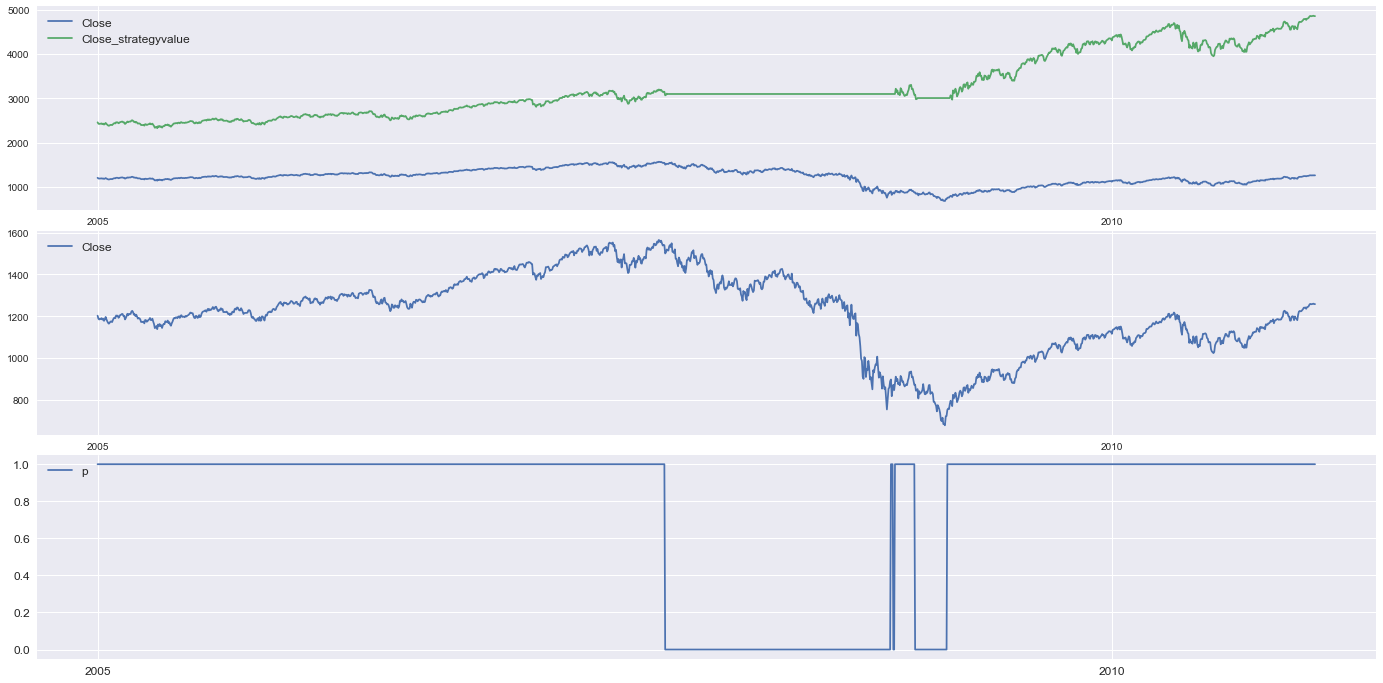

In [54]:
%run fmplot
s=dt.datetime(2005,1,1)
e=dt.datetime(2010,12,31)
fmplot(dfbt,variables=[['Close','Close_strategyvalue'],'Close','p'],startdate=s,enddate=e)

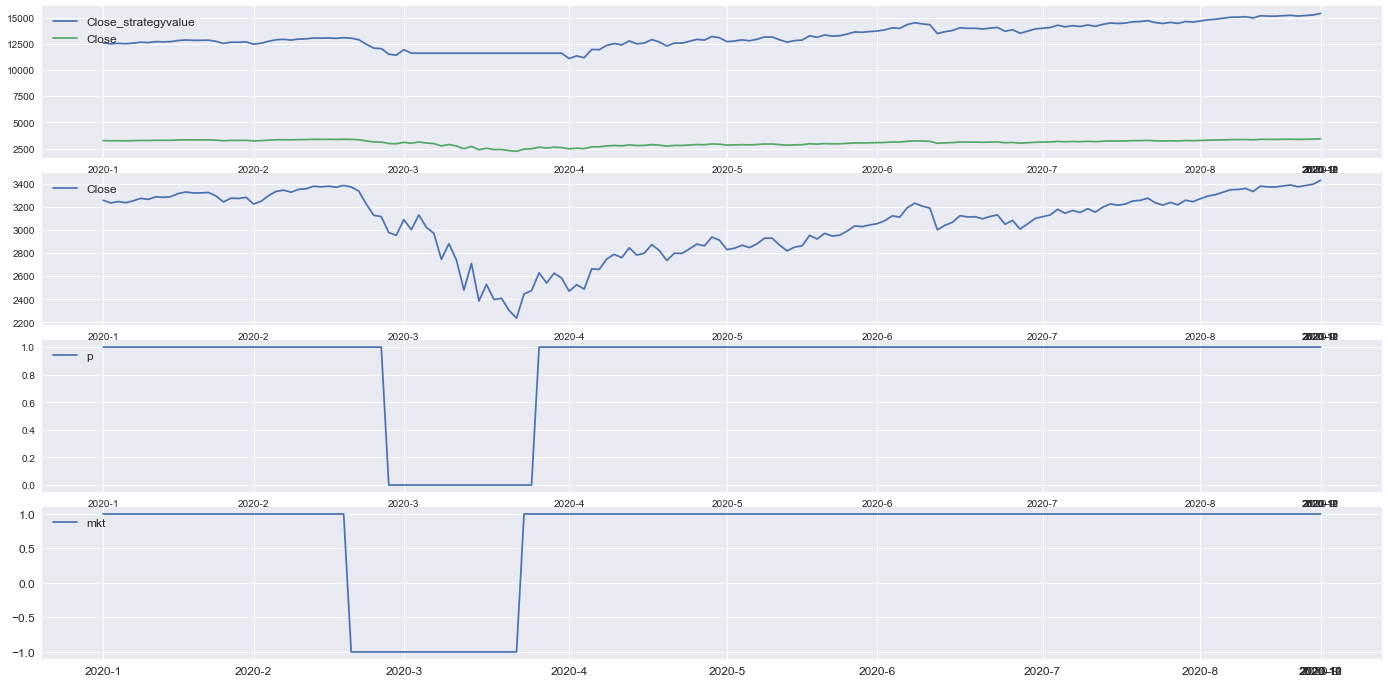

In [53]:
%run fmplot
s=dt.datetime(2020,1,1)
e=dt.datetime(2020,12,31)
fmplot(dfbt,variables=[['Close_strategyvalue', 'Close'],'Close','p','mkt'],startdate=s,enddate=e)